<a href="https://colab.research.google.com/github/aaronjoju07/NNDL/blob/main/Lab_1_Logic_gates_using_a_Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AND

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Initial weights: [0.99960759 0.60989798]
Initial bias: 0.128296726048298
Final weights: [0.59960759 0.30989798]
Final bias: -0.6717032739517019
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


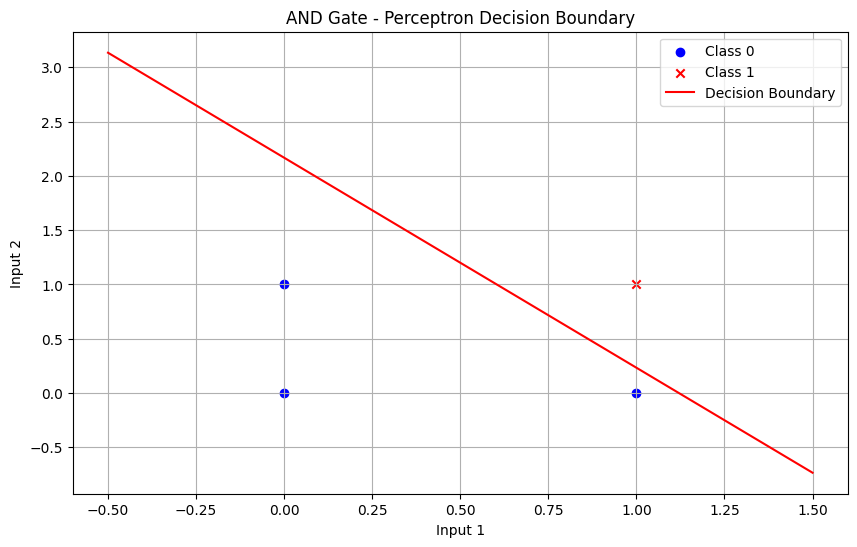

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return self.activation_function(linear_output)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
print("Initial weights:", perceptron.weights)
print("Initial bias:", perceptron.bias)

perceptron.train(X, y)

print("Final weights:", perceptron.weights)
print("Final bias:", perceptron.bias)

# Test the perceptron
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Prediction: {prediction}")

# Visualize
def plot_decision_boundary(perceptron, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0', color='blue', marker='o')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1', color='red', marker='x')

    # Decision boundary
    x1 = np.linspace(-0.5, 1.5, 100)
    if perceptron.weights[1] != 0:  # Avoid division by zero
        x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]
        plt.plot(x1, x2, 'r', label='Decision Boundary')
    else:
        plt.axvline(x=-perceptron.bias/perceptron.weights[0], color='k', linestyle='--', label='Decision Boundary')

    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('AND Gate - Perceptron Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron, X, y)

1.How do the weights and bias values change during training for the AND gate?

A:
Initialization: The weights and bias are initialized with random or zero values.

Input-Output Comparison: For each input (e.g., [0,0], [0,1], [1,0], [1,1]) in the training set, the perceptron computes the weighted sum of the inputs and applies the activation function (step function) to produce the output.

Error Calculation: The difference between the predicted output and the actual target (ground truth of the AND gate) is calculated. If the output is incorrect, this error is used to adjust the weights and bias.

2.Can the perceptron successfully learn the AND logic with a linear decision boundary?

A:
 Yes, a perceptron can successfully learn the AND logic with a linear decision boundary. The AND gate is linearly separable because a single straight line can separate the two output classes (1 and 0). In a two-dimensional input space, the perceptron can adjust its weights and bias to create a decision boundary (a line) that correctly classifies the input combinations (00, 01, 10, and 11) according to the AND logic. Since the points (1,1) are separated from the rest (00, 01, 10) by a linear boundary, the perceptron can learn this function effectively.

### OR

Initial weights: [0.5065083  0.60833134]
Initial bias: 0.30032491296650654
Final weights: [0.5065083  0.60833134]
Final bias: -0.09967508703349348

Testing the OR gate perceptron:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


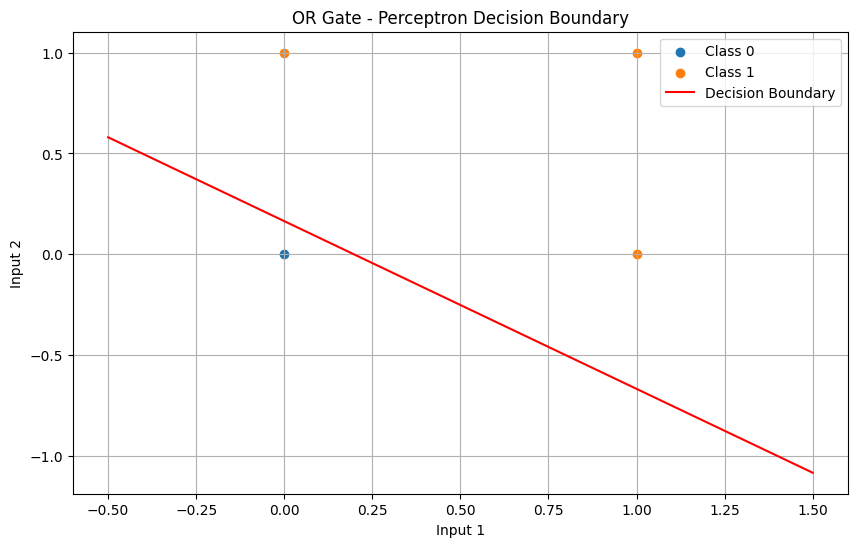

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Create and train the perceptron
or_perceptron = Perceptron(input_size=2)
print("Initial weights:", or_perceptron.weights)
print("Initial bias:", or_perceptron.bias)

or_perceptron.train(X, y)

print("Final weights:", or_perceptron.weights)
print("Final bias:", or_perceptron.bias)

# Test the perceptron
print("\nTesting the OR gate perceptron:")
for inputs in X:
    prediction = or_perceptron.predict(inputs)
    print(f"Input: {inputs}, Prediction: {prediction}")

# Visualize
def plot_decision_boundary(perceptron, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('OR Gate - Perceptron Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(or_perceptron, X, y)

1.What changes in the perceptron's weights are necessary to represent the OR gate logic?

A.To represent the OR gate logic, the perceptron’s weights and bias need to adjust such that the output is 1 for input pairs where at least one of the inputs is 1 (i.e., [0,1], [1,0], and [1,1]) and 0 only for the input [0,0]. Here's how the weights adjust:

Weight Initialization: Initially, the weights and bias are set to small random or zero values.
Error-Driven Learning: For each input (e.g., [0,0], [0,1], [1,0], [1,1]), the perceptron calculates the output and compares it with the target (which is 1 for all inputs except [0,0], where the target is 0).
Weight Update: When the output differs from the expected value, the weights are updated using the perceptron learning rule:
Δ
𝑤
=
𝜂
×
error
×
input
Δw=η×error×input
The weights will increase when the perceptron needs to output 1 and decrease if the perceptron mistakenly outputs 1 for the input [0,0].
Bias Update: The bias adjusts similarly based on the error. For the OR gate, the bias will become sufficiently positive to ensure that any input with at least one 1 produces an output of 1.
By the end of training, the perceptron will have learned weights that correctly classify the inputs for the OR gate.

2.How does the linear decision boundary look for the OR gate classification?

A.The linear decision boundary for the OR gate is a straight line in the input space that separates the output 1 region from the output 0 region. For the OR gate:

The input [0,0] is the only point classified as 0.
The inputs [0,1], [1,0], and [1,1] are classified as 1.
Visualization:

In a 2D space with inputs x1 and x2 as the axes, the decision boundary is typically a line with a negative slope, such as
𝑥
1
+
𝑥
2
=
threshold
x1+x2=threshold.
This line will pass below the point [1,1], and the region above the line will classify the points [0,1], [1,0], and [1,1] as 1. The point [0,0] will be below this line, corresponding to the output 0.
The line divides the space into two halves:

Above the line: Points that output 1 ([0,1], [1,0], [1,1]).
Below the line: Point that outputs 0 ([0,0]).
This decision boundary ensures that the perceptron correctly classifies the OR gate's logic.


### AND-NOT

Initial weights: [0.35074223 0.19711441]
Initial bias: 0.7964489558932899
Final weights: [-0.24925777 -0.20288559]
Final bias: 0.39644895589329

Testing the AND-NOT gate perceptron:
Input: [0 0], Prediction: 1, Actual: 1
Input: [0 1], Prediction: 1, Actual: 1
Input: [1 0], Prediction: 1, Actual: 1
Input: [1 1], Prediction: 0, Actual: 0

Classification Accuracy: 100.0%


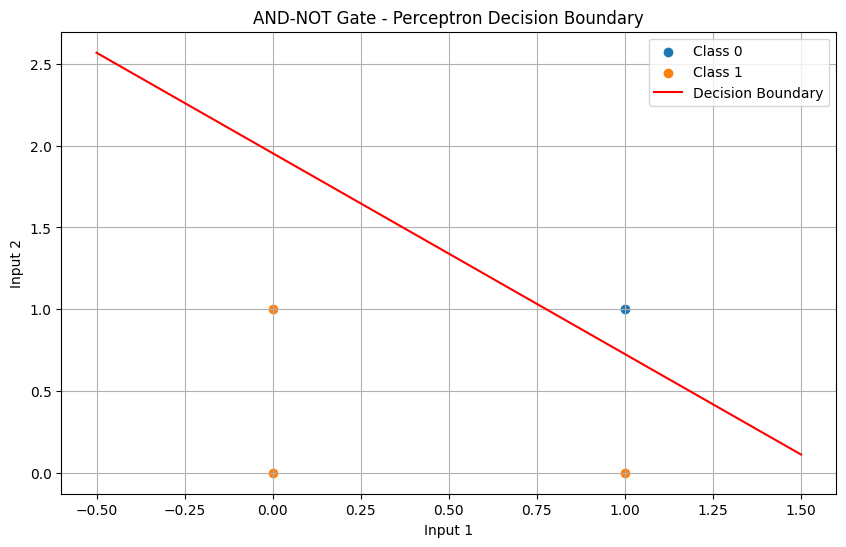

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])

# Create and train the perceptron
and_not_perceptron = Perceptron(input_size=2)
print("Initial weights:", and_not_perceptron.weights)
print("Initial bias:", and_not_perceptron.bias)

and_not_perceptron.train(X, y)

print("Final weights:", and_not_perceptron.weights)
print("Final bias:", and_not_perceptron.bias)

# Test the perceptron
print("\nTesting the AND-NOT gate perceptron:")
correct_predictions = 0
for inputs, label in zip(X, y):
    prediction = and_not_perceptron.predict(inputs)
    correct_predictions += int(prediction == label)
    print(f"Input: {inputs}, Prediction: {prediction}, Actual: {label}")

accuracy = correct_predictions / len(y) * 100
print(f"\nClassification Accuracy: {accuracy}%")

# Visualize
def plot_decision_boundary(perceptron, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('AND-NOT Gate - Perceptron Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(and_not_perceptron, X, y)

1.What is the perceptron's weight configuration after training for the AND-NOT gate?

A.In an AND-NOT gate, the perceptron needs to output 1 only when the first input is 1 and the second input is 0 (i.e., input [1,0]). To achieve this:

The weight for the first input is positive to contribute to the output when this input is 1.
The weight for the second input is negative because it effectively negates the second input (making it a NOT operation).
The bias is set to a small negative value to ensure the perceptron outputs 1 only for the desired input.
After training, the perceptron might have:

A positive weight for the first input.
A negative weight for the second input.
A small negative bias.
This configuration ensures that the perceptron produces the correct output for the AND-NOT gate.


2.How does the perceptron handle cases where both inputs are 1 or 0?

A.For input [0,0]: The weighted sum of the inputs is low because both inputs are zero. The output will be 0, as expected for the AND-NOT gate.

For input [1,1]: Although the first input is positive, the second input has a negative weight that cancels out the positive contribution of the first input. The output will also be 0, as both inputs being 1 does not satisfy the AND-NOT condition.

In summary:

When both inputs are 0, the perceptron outputs 0.
When both inputs are 1, the negative weight on the second input ensures the output is also 0.


### XOR

Initial weights: [0.39399032 0.63501342]
Initial bias: 0.709880426249822
Final weights: [-0.10600968  0.03501342]
Final bias: 0.009880426249822022

Testing the XOR gate perceptron:
Input: [0 0], Prediction: 1, Actual: 0
Input: [0 1], Prediction: 1, Actual: 1
Input: [1 0], Prediction: 0, Actual: 1
Input: [1 1], Prediction: 0, Actual: 0

Classification Accuracy: 50.0%


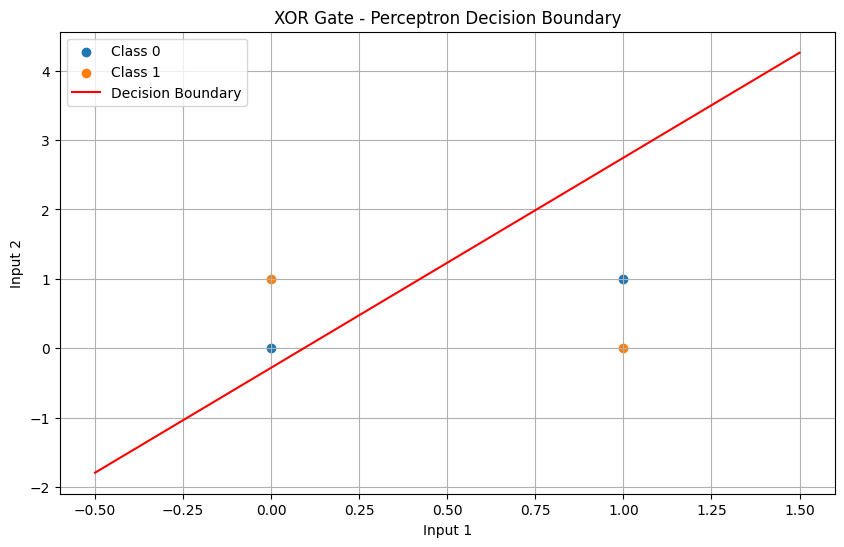

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create and train the perceptron
xor_perceptron = Perceptron(input_size=2)
print("Initial weights:", xor_perceptron.weights)
print("Initial bias:", xor_perceptron.bias)

xor_perceptron.train(X, y)

print("Final weights:", xor_perceptron.weights)
print("Final bias:", xor_perceptron.bias)

# Test the perceptron
print("\nTesting the XOR gate perceptron:")
correct_predictions = 0
for inputs, label in zip(X, y):
    prediction = xor_perceptron.predict(inputs)
    correct_predictions += int(prediction == label)
    print(f"Input: {inputs}, Prediction: {prediction}, Actual: {label}")

accuracy = correct_predictions / len(y) * 100
print(f"\nClassification Accuracy: {accuracy}%")

# Visualize
def plot_decision_boundary(perceptron, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('XOR Gate - Perceptron Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(xor_perceptron, X, y)

1.Why does the Single Layer Perceptron struggle to classify the XOR gate?

A.
The Single Layer Perceptron struggles to classify the XOR gate because the XOR function is not linearly separable. This means that there is no single straight line that can separate the inputs that should produce an output of 1 from those that should produce an output of 0. The XOR gate outputs 1 when the inputs are different (e.g., [0,1] or [1,0]), and 0 when the inputs are the same (e.g., [0,0] or [1,1]). These points cannot be separated by a single linear boundary, which is the only type of boundary a single-layer perceptron can form. As a result, it fails to learn the correct classification for XOR.


2.What modifications can be made to the neural network model to handle the XOR gate correctly?

A.
To correctly classify the XOR gate, you can modify the model by using a Multi-Layer Perceptron (MLP) or a neural network with at least one hidden layer. Here's how it helps:

Non-linear separability: Adding a hidden layer allows the network to combine multiple linear decision boundaries, which helps handle non-linearly separable problems like XOR.
Activation functions: In a multi-layer model, non-linear activation functions (like ReLU or sigmoid) in the hidden layer enable the network to learn complex patterns in the data.
By introducing these elements, the neural network can create the necessary internal representations to correctly classify the XOR function. The hidden layer allows the network to form a decision boundary that can separate the XOR inputs correctly.
